# Übungszettel 3: Matplotlib, Pandas, PCA (Musterlösung)

## Maschinelles Lernen - WiSe 23/24

### Abgabe 08.11.2023, 23:55 Uhr

*Hinweise:*
- Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. 
- Es wird pro Übungszettel nur eine Aufgabe bewertet, die übrigen Aufgaben dienen zur selbstständigen Vertiefung des Vorlesungsstoffs. Für diese Aufgaben werden nach der Abgabe Musterlösungen bereitgestellt.
- Die Lösungen sollen in diesem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
- Für die Abgabe sollen Sie dieses IPython Notebook und ggf. zugehörige Dateien in ein **Ziparchiv** packen und im Ilias hochladen. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben und Umlaute ggf. ersetzt werden sollen.

---
## Aufgabe 1: Matplotlib und Numpy
*Hinweis:* Nutzen Sie die Bibliotheken `matplotlib` und `numpy`. Ziel der Übungsaufgabe ist es, sich mit diesen Bibliotheken vertraut zu machen. Damit Plots Bilder innerhalb der IPython Notebook-Datei eingebunden werden, kann der Befehl `%matplotlib inline` benutzt werden.

a) Verwenden Sie in dieser Aufgabe Slicing

* Generieren Sie zunächst ein Numpy Array `a_3d` mit der Shape `(3,300)`, welches nur Nullen enthält. Erzeugen Sie dann ein weiteres Array `a_2d` mit der Shape `(2,300)`, welches normalverteilte Zufallszahlen ($\mu=0, \sigma^2=1$) enthält. Weisen Sie dieses Array den ersten beiden Dimensionen von `a_3d` zu.
* Generieren Sie ein weiteres Array `b_3d`, indem die `a_3d` kopieren (`copy()`). Generieren Sie 300 weitere normalverteilte Zufallszahlen, diesmal mit ($\mu=1, \sigma^2=0.5$) und weisen Sie diese der 2. Dimension von `b_3d` zu.
* Erzeugen Sie einen 2D Scatterplot von den jeweils ersten beiden Dimensionen von `a_3d` und `b_3d`


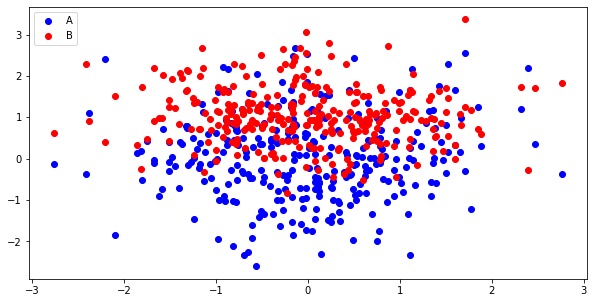

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

a_3d = np.zeros((3,300))
a_2d = np.random.normal(0,np.sqrt(1),(2,300))
a_3d[:2] = a_2d

b_3d = a_3d.copy() 
b_1d = np.random.normal(1,np.sqrt(0.5), 300)
b_3d[1] = b_1d


plt.figure(figsize=(10,5))
plt.scatter(*a_3d[:2], c='b',label='A')
plt.scatter(*b_3d[:2], c='r', label='B')
plt.legend(loc='upper left')
plt.show()

b) Verwenden Sie in dieser Aufgabe Numpy und Broadcasting.

* Ziehen Sie von den ersten 150 Werten in der 2. Dimension von `a_3d` den Wert 5 ab
* Addieren Sie zu den restlichen 150 Werten in der 2. Dimension von `a_3d` den Wert 5 
* Multiplizieren Sie die Werte in der 1. Dimension von `b_3d` mit 1.5, die in der 2. Dimension mit 0.5

Visualisieren Sie die ersten beiden Dimensionen der beiden Arrays in einem Scatterplot.

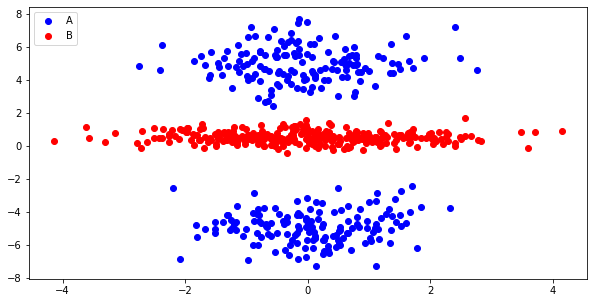

In [5]:
t = np.array([ [0] ,[5], [0] ])
a_3d[:,:150] -= t
a_3d[:,150:] += t

s = np.array([1.5, 0.5, 1]).reshape((3,1))
b_3d = b_3d * s
plt.figure(figsize=(10,5))
plt.scatter(*a_3d[:2], c='b',label='A')
plt.scatter(*b_3d[:2], c='r', label='B')
plt.legend(loc='upper left')
plt.show()

c) Tauschen Sie die 2. und 3. Dimension von `b_3d` und visualisieren Sie `a_3d`und `b_3d` als 3D Scatterplot.

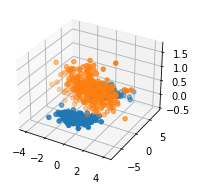

In [6]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*a_3d)

b_3d[[1,2]] = b_3d[[2,1]] 
ax.scatter(*b_3d)
ax.figsize = (10,5)
plt.show()

---
## Aufgabe 2: Pandas, Matplotlib, Scipy

In dieser Aufgabe sollen Sie sich mit der Funktionsweise der Bibliotheken `pandas` und `scipy` vertraut machen.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

a) Lesen Sie die Datei https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv mit `pandas` ein. 

Erstellen Sie mit `matplotlib` jeweils ein Balkendiagramm für die Variablen `year` (x-Achse) und `co2` (Höhe der Balken) für folgende Werte der Spalte `country`:
* `Germany`
* `United States`
* ein weiteres Land Ihrer Wahl

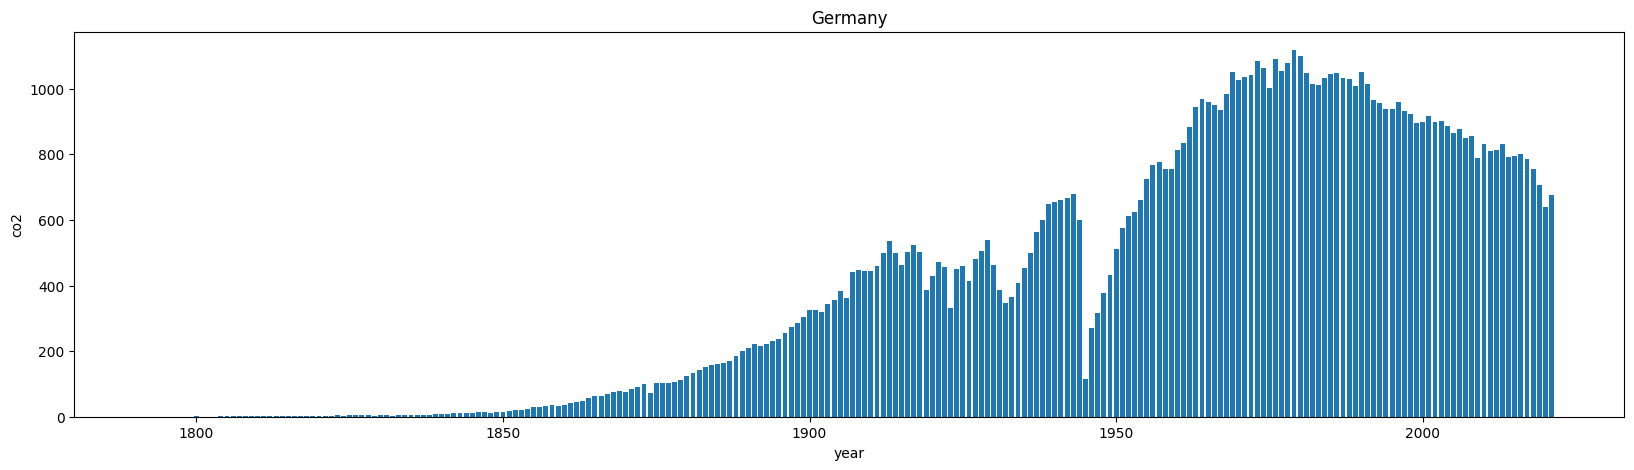

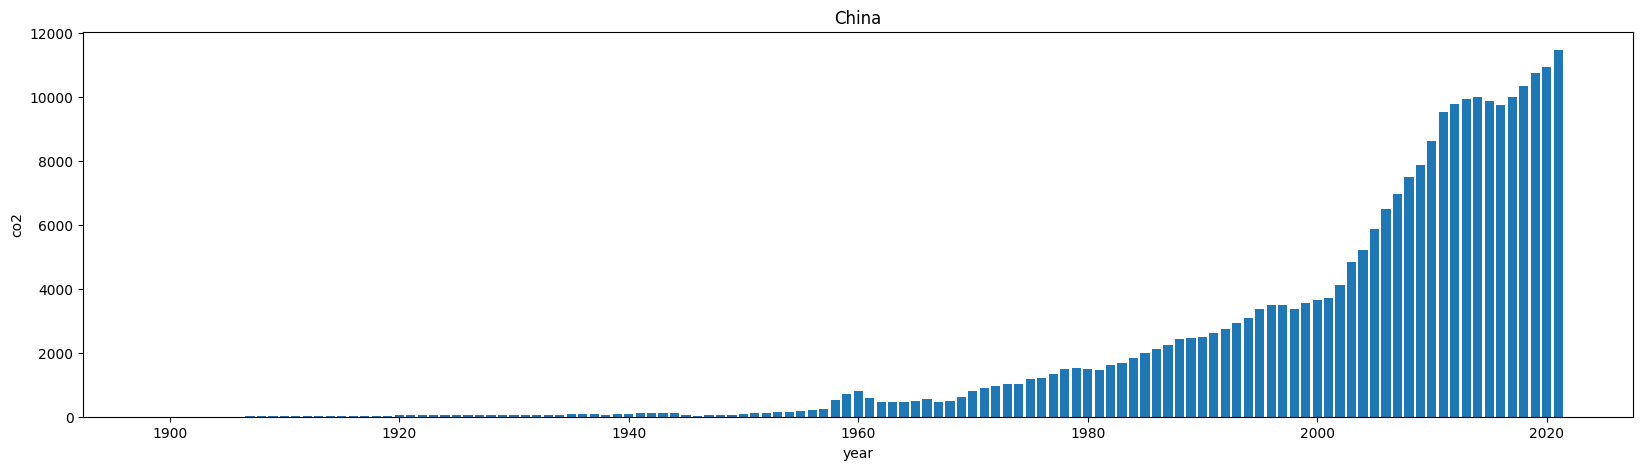

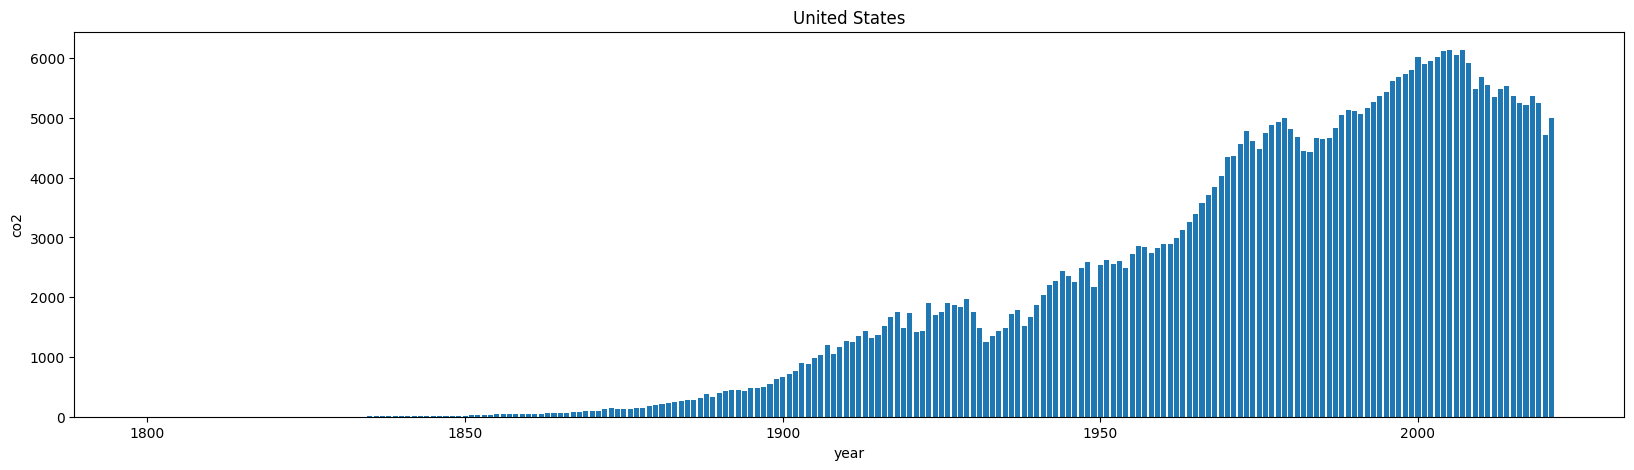

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

country, year, emission = 'country', 'year', 'co2'

def plot_data(country_name):  
    fig, ax = plt.subplots(figsize=(20,5))
    data = df[df[country]==country_name]
    ax.bar(data[year].values, data[emission].values)
    ax.set_title(country_name)
    ax.set_xlabel(year)
    ax.set_ylabel(emission)
    plt.show()
    
countries =[ 'Germany', 'China', 'United States' ]

for c in countries:
    plot_data(c)

b) Erstellen Sie eine neue Spalte mit den Pro-Kopf Emissionen, indem sie die Werte der Spalte `co2` durch die der Spalte `population` teilen.

Erstellen Sie einen weiteren Plot, auf dem die Balkendiagramme der Emissionen pro Kopf ab dem Jahr 1990 (`year >= 1990`) nach Ländern gruppiert dargestellt werden (für die gleichen drei Länder wie in der vorherigen Aufgabe). 

*Tipp:* Nutzen Sie dafür die Library `seaborn`.

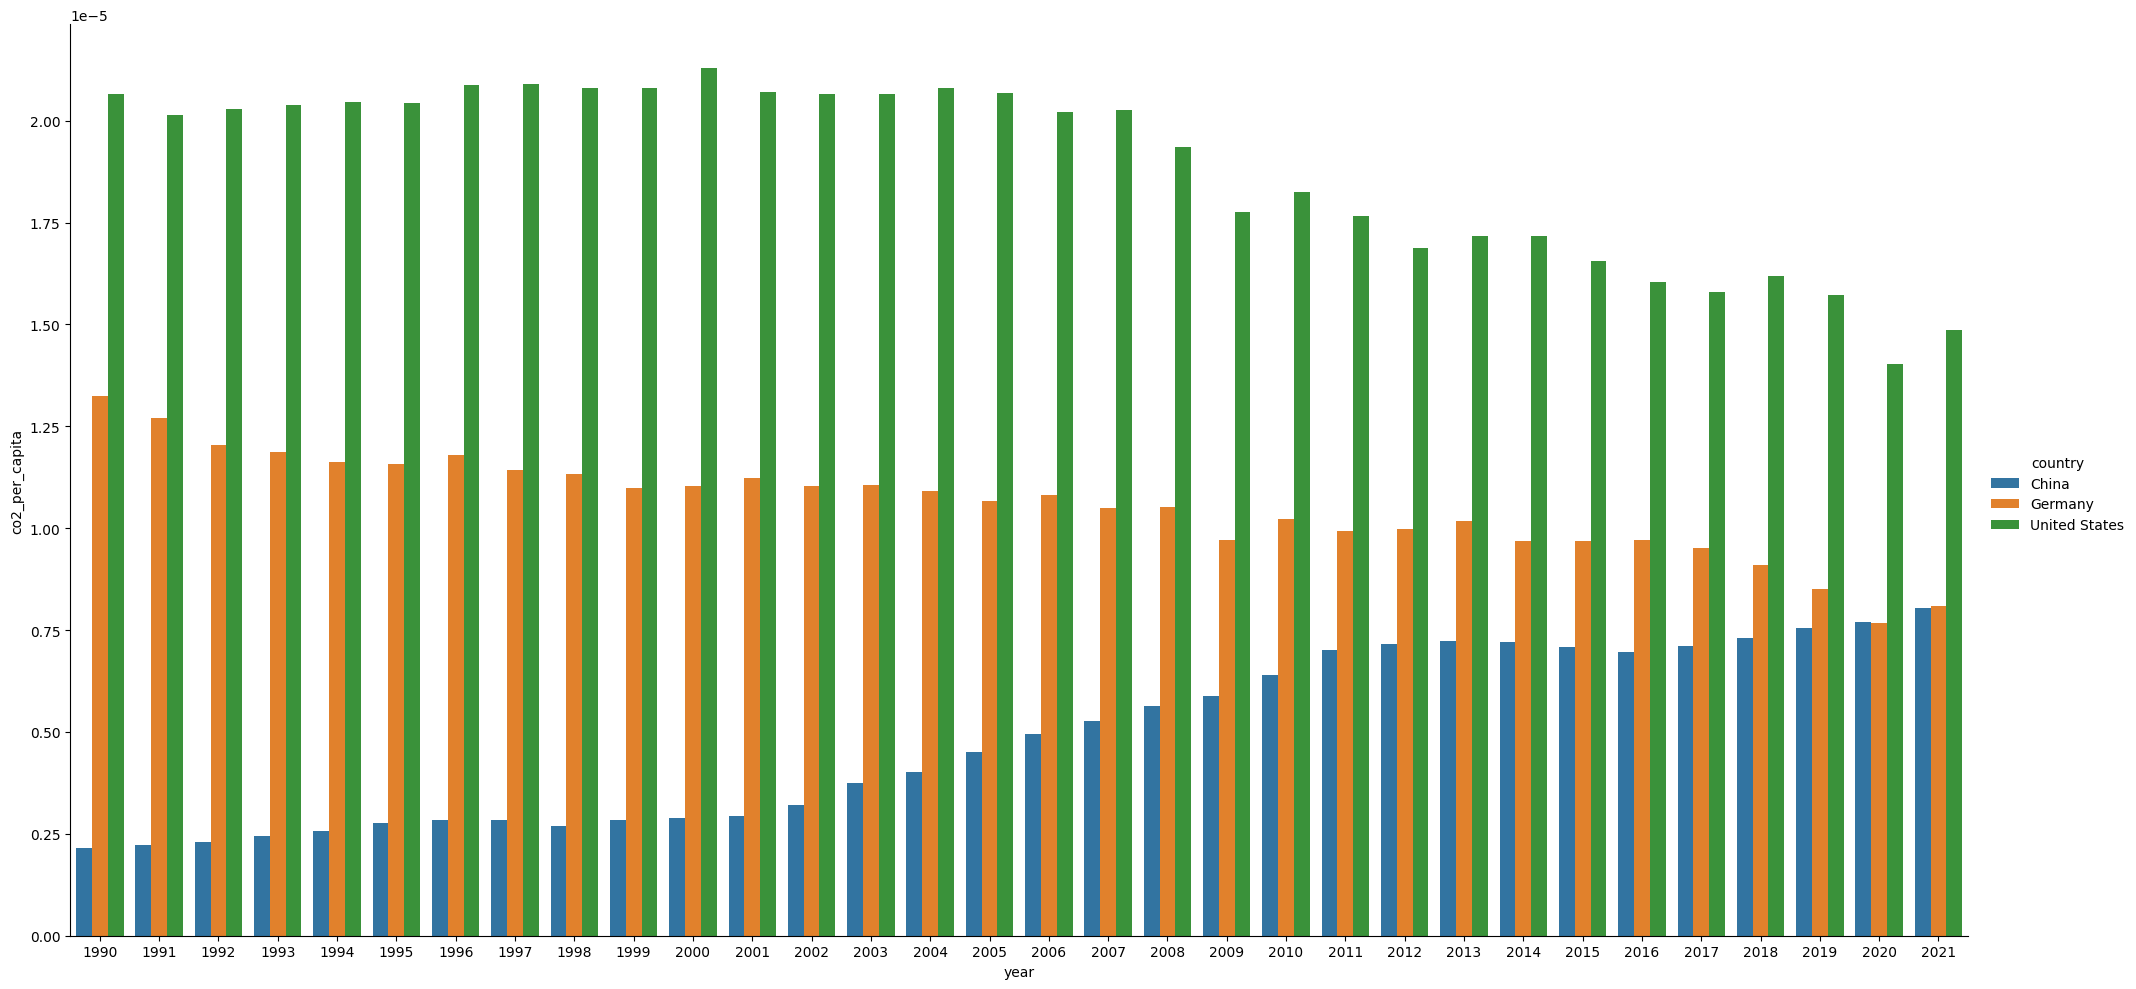

In [5]:
df['co2_per_capita'] = df['co2'] / df['population']
    
countries =[ 'Germany', 'China', 'United States' ]    
    
sns.catplot(x = year,    
            y = 'co2_per_capita',
            hue = country,  # group variable name
            data = df[(df[country].isin(countries)) & (df[year] >= 1990)],     
            kind = "bar", height=10, aspect=20/10)
plt.show()

c) Berechnen Sie die Pearson-Korrelation und sowie den Spearman-Rangkorrelationskoeffizienten für die Spalten `population` und `co2` mit `year >= 1900`, jeweils für `country=World` und `country=Germany` mithilfe der Bibliothek `scipy`.

In [32]:
df_world = df[(df["country"]=="World") & (df["year"]>=1900)][["population", "co2"]]
df_ger = df[(df["country"]=="Germany") & (df["year"]>=1900)][["population", "co2"]]

In [33]:
print("Pearson (World):", scipy.stats.pearsonr(df_world['population'], df_world['co2']).statistic)
print("Spearman (World):", scipy.stats.spearmanr(df_world['population'], df_world['co2']).statistic)

print("Pearson (Germany):", scipy.stats.pearsonr(df_ger['population'], df_ger['co2']).statistic)
print("Spearman (Germany):", scipy.stats.spearmanr(df_ger['population'], df_ger['co2']).statistic)

Pearson (World): 0.9957710285864569
Spearman (World): 0.9949639978719256
Pearson (Germany): 0.8075319496622967
Spearman (Germany): 0.7261459052742539


---
## Aufgabe 3:  Levenshtein Distanz

a) Implementieren Sie eine Funktion `levenshtein_distance(s1, s2, del_cost, ins_cost, sub_cost)` in Python, die die Levenshtein Distanz zwischen zwei Strings `s1` und `s2` berechnet. 
Über die Parameter `del_cost`, `ins_cost` und `sub_cost` werden die Kosten für Löschen, Einfügen und Ersetzen übergeben.

Beachten Sie, dass die Implementierung effizient sein muss. Nutzen Sie dazu die Methode der [Dynamischen Programmierung](https://de.wikipedia.org/wiki/Dynamische_Programmierung), wie in dem als pdf angehängten Beispiel gezeigt.

In [44]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [37]:
def levenshtein_distance(s1, s2, del_cost, ins_cost, sub_cost, return_matrix=False):
    rows = len(s1) + 1
    cols = len(s2) + 1
    d = np.zeros((rows, cols))
    for i in range(1,rows):
        d[i][0] = i * del_cost
    for j in range(1,cols):
        d[0][j] = j * ins_cost
    for i in range(1,rows):
        for j in range(1,cols):
            if s1[i-1] == s2[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                d[i][j] = min(d[i-1][j-1] + sub_cost,
                             d[i][j-1] + ins_cost,
                             d[i-1][j] + del_cost)
    if return_matrix:
        return d
    else:
        return d[-1][-1]

b) Wenden Sie die Funktion aus a) jeweils paarweise auf die Strings "Maschinelles Lernen", "Machine Learning" und "Vorlesung Maschinelles Lernen" mit unterschiedlichen Kosten für Löschen, Einfügen und Ersetzen an. Nutzen Sie folgende Werte:

* `del_cost=0.5`, `ins_cost=0.5` und `sub_cost=0.5`
* `del_cost=2`, `ins_cost=0.5` und `sub_cost=0.5`
* `del_cost=0.5`, `ins_cost=0.5` und `sub_cost=2`

In [39]:
costs = [
    {'del_cost': 0.5, 'ins_cost': 0.5, 'sub_cost': 0.5},
    {'del_cost': 2.0, 'ins_cost': 0.5, 'sub_cost': 0.5},
    {'del_cost': 0.5, 'ins_cost': 0.5, 'sub_cost': 2.0},
]
strings = ["Maschinelles Lernen", "Machine Learning", "Vorlesung Maschinelles Lernen"]

string_pairs = list(itertools.permutations(strings, 2))

In [40]:
for cost in costs:
    print(cost)
    for s1, s2 in string_pairs:
        d = levenshtein_distance(s1,s2,**cost)
        print(f"dist('{s1}','{s2}') = {d:.2f}")
    print()

{'del_cost': 0.5, 'ins_cost': 0.5, 'sub_cost': 0.5}
dist('Maschinelles Lernen','Machine Learning') = 4.00
dist('Maschinelles Lernen','Vorlesung Maschinelles Lernen') = 5.00
dist('Machine Learning','Maschinelles Lernen') = 4.00
dist('Machine Learning','Vorlesung Maschinelles Lernen') = 9.00
dist('Vorlesung Maschinelles Lernen','Maschinelles Lernen') = 5.00
dist('Vorlesung Maschinelles Lernen','Machine Learning') = 9.00

{'del_cost': 2.0, 'ins_cost': 0.5, 'sub_cost': 0.5}
dist('Maschinelles Lernen','Machine Learning') = 9.50
dist('Maschinelles Lernen','Vorlesung Maschinelles Lernen') = 5.00
dist('Machine Learning','Maschinelles Lernen') = 5.00
dist('Machine Learning','Vorlesung Maschinelles Lernen') = 10.00
dist('Vorlesung Maschinelles Lernen','Maschinelles Lernen') = 20.00
dist('Vorlesung Maschinelles Lernen','Machine Learning') = 29.50

{'del_cost': 0.5, 'ins_cost': 0.5, 'sub_cost': 2.0}
dist('Maschinelles Lernen','Machine Learning') = 4.50
dist('Maschinelles Lernen','Vorlesung Maschin

c) Erweitern Sie die Funktion aus a) um einen Parameter `return_matrix=False`. Wenn dieser auf `True` gesetzt ist, soll die Funktion die Editier-Distanz-Matrix zurückliefern.
Berechnen Sie die Matrix und visualisieren Sie diese mithilfe von `matplotlib` für `s1='Maschinelles Lernen'`, `s2='Machine Learning'` mit `del_cost=0.5`, `ins_cost=0.5` und `sub_cost=0.5`.

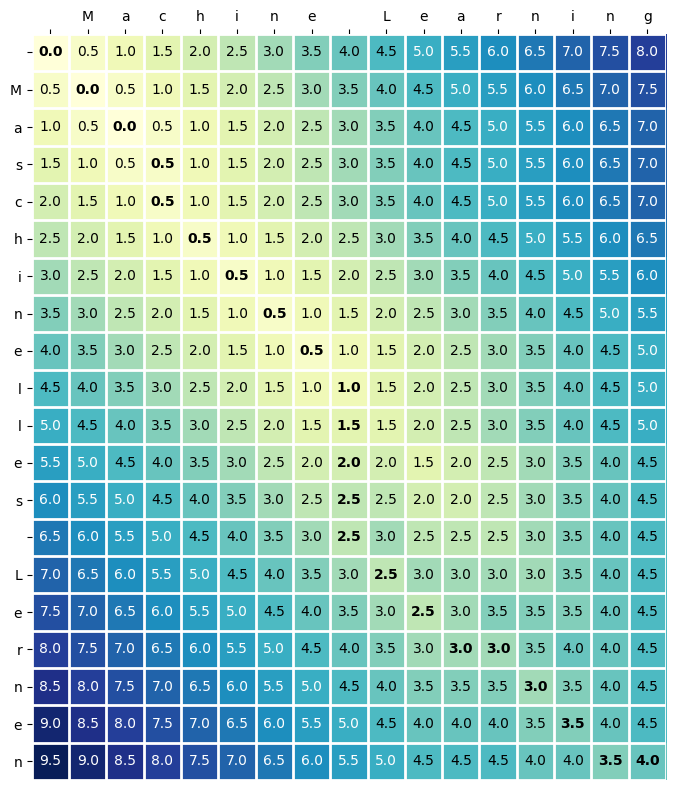

In [55]:
def plot_levenshtein_distance_matrix(dist):
    """
    Calculates the levenshtein distance matrix for two given strings and optional operation costs
    and plots it as a heatmap, visualizing (one of) the optimal path
    :param dist: the distance matrix
    """

    fig, ax = plt.subplots(figsize = (len(s1) / 2, len(s2) / 2))
    im = ax.imshow(dist, aspect='equal', cmap="YlGnBu")

    # Show characters as ticks
    ax.set_yticks(np.arange(len(s1) + 1))
    ax.set_xticks(np.arange(len(s2) + 1))

    ax.set_yticklabels(" " + s1)
    ax.set_xticklabels(" " + s2)

    ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False)

    # Turn spines off and create white grid
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(dist.shape[1] + 1) - .5, minor=True)
    ax.set_yticks(np.arange(dist.shape[0] + 1) - .5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Loop over data dimensions and create text annotations
    threshold = im.norm(dist.max()) / 2.0

    # backtrack the distance matrix to find (one of) the ideal path
    steps = backtrack(dist)

    for i in range(len(s1) + 1):
        for j in range(len(s2) + 1):
            is_optimal_step = next((step for step in steps if step['i'] == i and step['j'] == j), None)

            # mark the ideal path using bold font
            weight = 'bold' if is_optimal_step else 'normal'
            color = 'white' if im.norm(dist[i, j]) > threshold else 'black'
            text = ax.text(j, i, dist[i, j],
                           ha="center", va="center", color=color, weight=weight)

    fig.tight_layout()
    plt.show()

    
def backtrack(dist, verbose=False):
    """
    Backtracks a levenshtein distance matrix, returning (one of) the optimal path.
    :param dist: The distance matrix
    :param verbose: If true, each step will be printed to the log
    :return: (One of) the optimal path.
    """
    
    def backtrack_step(i, j, steps=[]):    
        steps.append({'i': i, 'j': j})

        if (i == 0 & j == 0):
            return steps

        if verbose:
            print(f'i: {i}, j: {j}, dist: {dist[i, j]}')

        predecessors = [dist[i, j-1], dist[i-1, j], dist[i-1, j-1]]

        # This only follows one path, but many are possible
        predecessor = predecessors.index(min(predecessors))

        if predecessor == 0:
            j -= 1
        elif predecessor == 1:
            i -= 1
        else:
            i -= 1
            j -= 1

        return backtrack_step(i, j, steps)
    
    return backtrack_step(i=dist.shape[0] - 1, j=dist.shape[1] - 1)    

s1 = 'Maschinelles Lernen'
s2 = 'Machine Learning'
dist = levenshtein_distance(s1, s2, 0.5, 0.5, 0.5, True)

plot_levenshtein_distance_matrix(dist)

---

## **Aufgabe 4: PCA (bewertet: 1+3+1 Punkte)**

a) Beschreiben Sie, welchen Zweck die PCA verfolgt bzw. unter welchen Umständen eine PCA sinnvoll ist.

Ziele:
- Transformation in den Unterraum
- Auflösung von Korrelationen

Voraussetzungen:
- Daten sind korreliert
- Die Richtungen mit der größten Streuung (Varianz) beinhalten die meiste Information

Siehe auch VL 03, Folien 40 und 41.

b) Gegeben seien die folgenden 6 Datenpunkte $(x,y) \in \mathbb{R}^2$:

| x   | y   | 
| :-- |:----| 
| 1   | 0   | 
| 2   | 0   | 
| 3   | 0   | 
| 5   | 6   | 
| 6   | 6   | 
| 7   | 6   | 

Führen Sie eine PCA auf den gegebenen Daten von Hand durch. Bestimmen Sie dazu zunächst die Kovarianzmatrix und berechnen Sie daraus die Eigenwerte und Eigenvektoren.

*Hinweis: Sie müssen keine Standardisierung der Werte vornehmen*

## Lösung ohne Standardisierung

### Mittelwert von x und y:
$$ 
\begin{align}
\bar{x} &= \frac{1}{n} \sum ^n _{i=1} x_i = \frac{1} {5} (1 + 2 + 3 + 5 + 6 + 7) = 4 \\
\bar{y} &= \frac{1}{n} \sum ^n _{i=1} y_i = \frac{1} {5} (0 + 0 + 0 + 6 + 6 + 6) = 3 \\
\end{align}
$$


### Kovarianz zwischen x und y: 
$$ 
\begin{align}
s_{xy} &= \frac{1}{n-1} \sum ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})
= \frac{1}{5} ( (1 - 4) (0 - 3) + (2 - 4) (0 - 3) + (3 - 4) (0 - 3) + (5 - 4) (6 - 3) + (6 - 4) (6 - 3) + (7 - 4) (6 - 3))
= 7,2
\end{align}
$$

(mit 1/6: 6)

### Kovarianz zwischen x und x: 

$$ 
\begin{align}
s_{xx} &= \frac{1}{n-1} \sum ^n _{i=1}(x_i - \bar{x})(x_i - \bar{x})
= \frac{1}{5} ( (1 - 4)^2 + (2 - 4)^2 + (3 - 4)^2 + (5 - 4)^2 + (6 - 4)^2 + (7 - 4)^2) 
= 5,6
\end{align}
$$

(mit 1/6: 4,67)


### Kovarianz zwischen y und y: 

$$ 
\begin{align}
s_{yy} &= \frac{1}{n-1} \sum ^n _{i=1}(y_i - \bar{y})(y_i - \bar{y})
= \frac{1}{5} ( (0 - 3)^2 + (0 - 3)^2 + (0 - 3)^2 + (6 - 3)^2 + (6 - 3)^2 + (6 - 3)^2)
= 10,8
\end{align}
$$

(mit 1/6: 9)

### Kovarianzmatrix: 

$$
C= \left(\begin{array}{rr} 
5,6 & 7,2 \\ 
7,2 & 10,8 \\ 
\end{array}\right)
$$

(mit 1/6: 
$
C= \left(\begin{array}{rr} 
4,67 & 6 \\ 
6    & 9 \\ 
\end{array}\right)
$
)

### Determinante: 

$$
\begin{align}
Det[C- \lambda \cdot I] &= Det[\left(\begin{array}{rr} 
                                    5,6-\lambda & 7,2 \\ 
                                    7,2 & 10,8- \lambda \\ 
                                 \end{array}\right)] \\
                         &= (5,6 - \lambda)(10,8 - \lambda) - (7,2)(7,2) \\
                       &= \lambda^2 - 16,4 \lambda + 8,64 \\
\end{align}
$$

### Eigenwerte:

$$
\lambda^2 - 16,4 \lambda + 8,64 = 0
$$

$$
\begin{align}
\lambda_1 &=  \dfrac{16,4 + \sqrt{16,4^2 - 4 \cdot 8,64}}{2} = 15,85 \\
\lambda_2 &=  \dfrac{16,4 - \sqrt{16,4^2 - 4 \cdot 8,64}}{2} = 0,5449
\end{align}
$$

(mit 1/6: $\lambda^2 - 13.67\lambda + 6 \\
\lambda_1 = 13.21, \lambda_2 = 0.45$
)

### Eigenvektoren:
#### $\lambda_1$-Fall: 

$$
\begin{align}
    \left(\begin{array}{rr} 
            5,6-\lambda_1 & 7,2 \\ 
            7,2 & 10,8- \lambda_1 \\ 
     \end{array}\right) \\                                   
\end{align} \cdot \left( \begin{array}{c}
                        a\\
                        b\\
                    \end{array}\right) = \left(\begin{array}{c} 
                                                0\\
                                                0\\
                                                \end{array} \right)
$$
(mit 1/6: 
$\begin{array}{c}
0,62\\
0,0.87588\\
\end{array}
$)

$$
\begin{align}
\begin{bmatrix}{}
-10,25 & 7,2 & 0 \\
7,2 & -5,05 &  0 \\
\end{bmatrix}  &\xrightarrow[]{R_1 \rightarrow \dfrac{R_1}{10,25}} \begin{bmatrix}{}
                                                                        -1 &  0,7 & 0 \\
                                                                        7,2 & -5,05 &  0 \\
                                                                     \end{bmatrix}\\
              &\xrightarrow[]{R_2  \rightarrow \dfrac{R_2}{7,2}}     \begin{bmatrix}{}
                                                                        -1 &  0,7 & 0 \\
                                                                         1 & -0.7 &  0 \\
                                                                     \end{bmatrix}\\ 
             &\xrightarrow[]{R_2  \rightarrow R_2 + R_1}     \begin{bmatrix}{}
                                                                        -1 &  0,7 & 0 \\
                                                                         0 &  0 &  0 \\
                                                                     \end{bmatrix}\\                                                                                                                                                  
\end{align}   
$$ 

$$
x_1 = b  \left(\begin{array}{c} 
                            0,7\\
                            1\\
                \end{array} \right)
$$

Für jedes $b\neq 0$. $x_1 = b  \left(\begin{array}{c} 
                            0,7\\
                            1\\
                \end{array} \right)$ sind die Eigenvektoren in Bezug auf den Eigenwert $\lambda_1=15,85$ 


(mit 1/6: gleiches Ergebnis)


#### $\lambda_2$-Fall: 

$$
\begin{align}
    \left(\begin{array}{rr} 
            5,6-\lambda_2 & 7,2 \\ 
            7,2 & 10,8- \lambda_2 \\ 
     \end{array}\right) \\                                   
\end{align} \cdot \left( \begin{array}{c}
                        a\\
                        b\\
                    \end{array}\right) = \left(\begin{array}{c} 
                                                0\\
                                                0\\
                                                \end{array} \right)
$$


$$
\begin{align}
\begin{bmatrix}{}
5,05 & 7,2 & 0 \\
7,2 & 10,255 &  0 \\
\end{bmatrix}  &\xrightarrow[]{R_1 \rightarrow \dfrac{R_1}{5,05}} \begin{bmatrix}{}
                                                                        1 &  1,425 & 0 \\
                                                                        7,2 & 10,255 &  0 \\
                                                                     \end{bmatrix}\\
              &\xrightarrow[]{R_2  \rightarrow \dfrac{R_2}{7,2}}     \begin{bmatrix}{}
                                                                        1 &  1,425 & 0 \\
                                                                         1 &  1,425 &  0 \\
                                                                     \end{bmatrix}\\ 
             &\xrightarrow[]{R_2  \rightarrow R_2 - R_1}     \begin{bmatrix}{}
                                                                        1 &  1,425 & 0 \\
                                                                         0 &   0 &  0 \\
                                                                     \end{bmatrix}\\                                                                                                                                                  
\end{align}   
$$ 

$$
x_2 = b \left(\begin{array}{c} 
                            -1,425\\
                            1\\
                \end{array} \right) 
$$


Für jedes $b\neq 0$. $x_2 = b \left(\begin{array}{c} 
                            -1,425\\
                            1\\
                \end{array} \right)$ sind die Eigenvektoren in Bezug auf den Eigenwert $\lambda_2=0,5449$  

(mit 1/6: gleiches Ergebnis)

## Lösung mit Standardisierung:

### Mittelwert von x und y:
$$ 
\begin{align}
\bar{x} &= \frac{1}{n} \sum ^n _{i=1} x_i = \frac{1} {6} (1 + 2 + 3 + 5 + 6 + 7) = 4 \\
\bar{y} &= \frac{1}{n} \sum ^n _{i=1} y_i = \frac{1} {6} (0 + 0 + 0 + 6 + 6 + 6) = 3 \\
\end{align}
$$

### Standardabweichung von x und y:
$$ 
\begin{align}
\sigma_{x} &= \sqrt{ \frac{1}{n} \sum ^n _{i=1} (x_i - \bar{x})^2 } = \sqrt{ \frac{1}{6} ({(1 - 4)}^2 + {(2 - 4)}^2 + {(3 - 4)}^2 + {(5 - 4)}^2 + {(6 - 4)}^2 + {(7 - 4)}^2) } = \sqrt{ \frac{1}{6} (9 + 4 + 1 + 1 + 4 + 9)} = \sqrt{ \frac{28}{6} } = 2,16 \\
\sigma_{y} &= \sqrt{ \frac{1}{n} \sum ^n _{i=1} (y_i - \bar{y})^2 } = \sqrt{ \frac{1}{6} ({(0 - 3)}^2 + {(0 - 3)}^2 + {(0 - 3)}^2 + {(6 - 3)}^2 + {(6 - 3)}^2 + {(6 - 3)}^2) } = \sqrt{ \frac{1}{6} (9 + 9 + 9 + 9 + 9 + 9)} = \sqrt{9} = 3 \\
\end{align}
$$

### Standardisierte Werte:
$$ 
\begin{align}
X &= \frac{x - \bar{x}} {\sigma_x} , &\bar{X} = 0 \\
Y &= \frac{y - \bar{y}} {\sigma_y} , &\bar{Y} = 0 \\
\end{align}
$$

| X     | Y   | 
| :---- |:----| 
| -1,39 | -1  | 
| -0,93 | -1  | 
| -0,46 | -1  | 
|  0,46 |  1  | 
|  0,93 |  1  | 
|  1,39 |  1  | 

### Kovarianz zwischen X und Y: 
$$ 
\begin{align}
s_{XY} &= \frac{1}{n-1} \sum ^n _{i=1}(X_i - \bar{X})(Y_i - \bar{Y}) 
= \frac{1}{5} ( -1,39 \cdot -1 -0,93 \cdot -1 -0,46 \cdot -1 + 0,46 \cdot 1 + 0,93 \cdot 1 + 1,39 \cdot 1 ) 
= \frac{1}{5} \cdot 5,56 
= 1,11
\end{align}
$$

### Kovarianz zwischen X und X: 

$$ 
\begin{align}
s_{XX} &= \frac{1}{n-1} \sum ^n _{i=1}(X_i - \bar{X})(X_i - \bar{X})
= \frac{1}{5} ( -1,39^2 -0,93^2 -0,46 ^2 + 0,46^2 + 0,93^2 + 1,39^2 )
= \frac{1}{5} \cdot 6,02
= 1,2
\end{align}
$$


### Kovarianz zwischen Y und Y: 

$$ 
\begin{align}
s_{XX} &= \frac{1}{n-1} \sum ^n _{i=1}(X_i - \bar{X})(X_i - \bar{X})
&= \frac{1}{5} ( -1^2 -1^2 -1^2 + 1^2 + 1^2 + 1^2 )
= \frac{1}{5} \cdot 6
= 1,2
\end{align}
$$

### Kovarianzmatrix: 

$$
C= \left(\begin{array}{rr} 
1,2  & 1,11 \\ 
1,11 & 1,2  \\ 
\end{array}\right)
$$


### Determinante: 

$$
\begin{align}
Det[C- \lambda \cdot I] &= Det[\left(\begin{array}{rr} 
                                    1,2-\lambda & 1,11 \\ 
                                    1,11 & 1,2- \lambda \\ 
                                 \end{array}\right)] \\
                         &= (1,2 - \lambda)(1,2 - \lambda) - (1,11)(1,11) \\
                         &= \lambda^2 - 2,4 \lambda + 0,21 \\
\end{align}
$$

### Eigenwerte:

$$
\lambda^2 - 2,4 \lambda + 0,21 = 0
$$

$$
\begin{align}
\lambda_1 &=  \dfrac{2,4 + \sqrt{2,4^2 - 4 \cdot 0,21}}{2} = 2,31 \\
\lambda_2 &=  \dfrac{2,4 - \sqrt{2,4^2 - 4 \cdot 0,21}}{2} = 0,09 \\
\end{align}
$$

### Eigenvektoren:
#### $\lambda_1$-Fall: 

$$
\begin{align}
    \left(\begin{array}{rr} 
            1,2 - \lambda_1 & 1,11 \\ 
            1,11 & 1,2 - \lambda_1 \\ 
     \end{array}\right) \\                                   
\end{align} \cdot \left( \begin{array}{c}
                        a\\
                        b\\
                    \end{array}\right) = \left(\begin{array}{c} 
                                                0\\
                                                0\\
                                                \end{array} \right)
$$

$$
\begin{align}
\begin{bmatrix}{}
-1,11 &  1,11 & 0 \\
1,11  & -1,11 &  0 \\
\end{bmatrix}  &\xrightarrow[]{R_1 \rightarrow \dfrac{R_1}{1,11}} \begin{bmatrix}{}
                                                                       -1    &  1    & 0 \\
                                                                        1,11 & -1,11 & 0 \\
                                                                   \end{bmatrix}\\
              &\xrightarrow[]{R_2  \rightarrow \dfrac{R_2}{1,11}}  \begin{bmatrix}{}
                                                                        -1 &  1 & 0 \\
                                                                         1 & -1 & 0 \\
                                                                    \end{bmatrix}\\ 
             &\xrightarrow[]{R_2  \rightarrow R_2 + R_1}     \begin{bmatrix}{}
                                                                        -1 &  1 & 0 \\
                                                                         0 &  0 & 0 \\
                                                                     \end{bmatrix}\\                                                                                                                                                  
\end{align}   
$$

$$
x_1 = b  \left(\begin{array}{c} 
                            1 \\
                            1 \\
                \end{array} \right)
$$

Für jedes $b\neq 0$. $x_1 = b \left(\begin{array}{c} 
                            1 \\
                            1  \\
                \end{array} \right)$ sind die Eigenvektoren in Bezug auf den Eigenwert $\lambda_1=2,31$ 


#### $\lambda_2$-Fall: 

$$
\begin{align}
    \left(\begin{array}{rr} 
            1,2-\lambda_2 & 1,11 \\ 
            1,11 & 1,2- \lambda_2 \\ 
     \end{array}\right) \\                                   
\end{align} \cdot \left( \begin{array}{c}
                        a\\
                        b\\
                    \end{array}\right) = \left(\begin{array}{c} 
                                                0\\
                                                0\\
                                                \end{array} \right)
$$

$$
\begin{align}
\begin{bmatrix}{}
1,11 & 1,11 & 0 \\
1,11 & 1,11 &  0 \\
\end{bmatrix}  &\xrightarrow[]{R_1 \rightarrow \dfrac{R_1}{1,11}} \begin{bmatrix}{}
                                                                        1    & 1    & 0 \\
                                                                        1,11 & 1,11 & 0 \\
                                                                  \end{bmatrix}\\
              &\xrightarrow[]{R_2  \rightarrow \dfrac{R_2}{1,11}}  \begin{bmatrix}{}
                                                                        1 &  1 & 0 \\
                                                                        1 &  1 & 0 \\
                                                                   \end{bmatrix}\\ 
             &\xrightarrow[]{R_2  \rightarrow R_2 + R_1}     \begin{bmatrix}{}
                                                                        1 &  1 & 0 \\
                                                                        0 &  0 & 0 \\
                                                              \end{bmatrix}\\                                                                           \end{align}   
$$

$$
x_2 = b \left(\begin{array}{c} 
                            -1 \\
                            1 \\
                \end{array} \right) 
$$


Für jedes $b\neq 0$. $x_2 = b \left(\begin{array}{c} 
                            -1 \\
                            1 \\
                \end{array} \right)$ sind die Eigenvektoren in Bezug auf den Eigenwert $\lambda_2=0,09$  

## Lösung mit Numpy (mit Standardisierung)

In [60]:
import numpy as np

In [73]:
mean = np.mean(points, axis=0)
mean

array([4., 3.])

In [74]:
std = np.std(points, axis=0)
std

array([2.1602469, 3.       ])

In [72]:
X = (points - mean) / std
X

array([[-1.38873015, -1.        ],
       [-0.9258201 , -1.        ],
       [-0.46291005, -1.        ],
       [ 0.46291005,  1.        ],
       [ 0.9258201 ,  1.        ],
       [ 1.38873015,  1.        ]])

In [100]:
cov_mat = np.cov(X.T)
cov_mat

array([[1.2       , 1.11098412],
       [1.11098412, 1.2       ]])

In [137]:
(eigenvals, W) = np.linalg.eig(cov_mat)
(eigenvals, W)  # Ergebnisvektoren sind normalisiert

(array([2.31098412, 0.08901588]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [ ]:
#

c) Nutzen Sie die Klasse `PCA` aus `sklearn.decomposition` und führen Sie die PCA auf den Daten aus b) durch. Visualisieren Sie die Daten vor und nach der PCA.

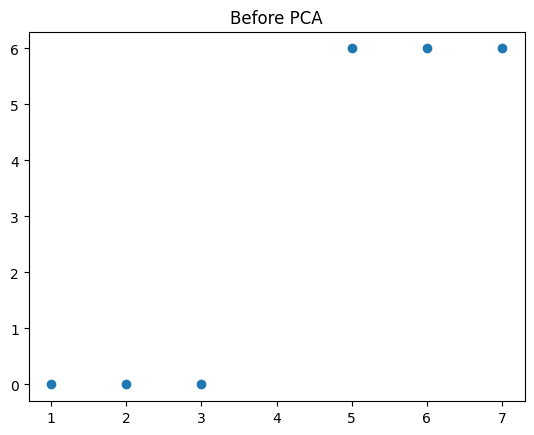

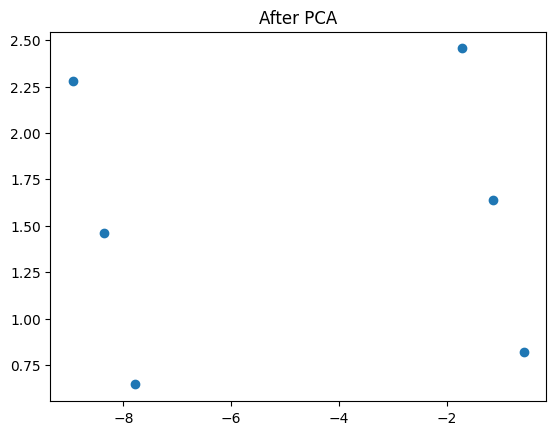

In [56]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

points = np.array([
    [1,0],
    [2,0],
    [3,0],
    [5,6],
    [6,6],
    [7,6]
])

# Visualize before
plt.scatter(*points.T)
plt.title("Before PCA")
plt.show()

# Apply PCA
dim = 2
pca = PCA(n_components=dim, svd_solver='randomized').fit(points)

# Visualize after
plt.scatter(*np.matmul(pca.components_,points.T))
plt.title("After PCA")
plt.show()

"""
# Visualize after, normalized (optional)
points_t = pca.transform(points)
origin = [[0,0], [0,0]]
plt.quiver(*origin, pca.components_[0], pca.components_[1])
plt.scatter(*points_t.T)
plt.title("After PCA (normalized)")
plt.show()
""";